In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from my_style import set_journal_style

In [2]:
df = pd.read_csv('wheat.txt')
scaler = StandardScaler()
wheat = scaler.fit_transform(df)

In [3]:
# 使用PCA进行数据降维 
pca = PCA()
X_pca = pca.fit_transform(wheat)

In [4]:
#每个主成分能解释的方差/累计方差贡献率
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# 计算总体协方差矩阵（分母为n）,pca.explained_variance_分母为n-1
cov_matrix = np.cov(wheat, rowvar=False, ddof=0)
# 手动计算特征值
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
explained_variance = eigenvalues[::-1]  # 降序排列
explained = pd.DataFrame([explained_variance,pca.explained_variance_ratio_,cumulative_variance],
             index=['explained_variance','explained_variance_ratio','cumulative_variance']).T
round(explained,5)


,explained_variance,explained_variance_ratio,cumulative_variance
0,2.91184,0.29118,0.29118
1,2.33571,0.23357,0.52476
2,1.78827,0.17883,0.70358
3,1.04919,0.10492,0.80850
4,0.83634,0.08363,0.89214
5,0.53201,0.05320,0.94534
6,0.35421,0.03542,0.98076
7,0.11419,0.01142,0.99218
8,0.07662,0.00766,0.99984
9,0.00160,0.00016,1.00000


In [5]:
# 该矩阵展示了每个主成分是原始数据的线性组合，以及线性的系数
columns = ['PC' + str(i) for i in range(1, 11)]
pca_loadings = pd.DataFrame(pca.components_,columns=df.columns,index=columns).T
round(pca_loadings, 4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
X1,0.2619,0.2518,0.1529,0.5200,0.3940,0.5674,0.2523,-0.1161,0.1409,-0.0074
X2,0.4791,0.0291,-0.2073,-0.0530,-0.3737,0.1734,-0.4953,-0.4151,0.3694,-0.0065
X3,0.2189,-0.0789,0.6390,-0.1921,0.0456,-0.2617,0.1263,0.1964,0.6126,0.0128
X4,0.4039,0.2298,-0.2764,-0.1173,0.0287,-0.4491,0.6006,-0.3548,-0.0674,0.0100
X5,-0.1755,0.5977,0.1191,-0.1293,-0.1891,0.0597,-0.0301,0.0161,0.0002,0.7352
X6,0.5128,0.0093,-0.1582,-0.1584,-0.2700,0.2597,0.1464,0.6991,-0.1903,0.0129
X7,-0.0360,0.4633,-0.1366,0.5460,-0.1247,-0.4431,-0.2219,0.3230,0.1542,-0.2794
X8,-0.1856,0.4959,0.2101,-0.4085,-0.1899,0.2591,0.0928,-0.1103,-0.0631,-0.6170
X9,0.3983,0.1581,0.3589,-0.0998,0.3828,-0.2056,-0.4504,-0.0615,-0.5311,-0.0109
X10,-0.0519,0.1839,-0.4670,-0.3992,0.6288,0.0319,-0.1770,0.2011,0.3432,-0.0090


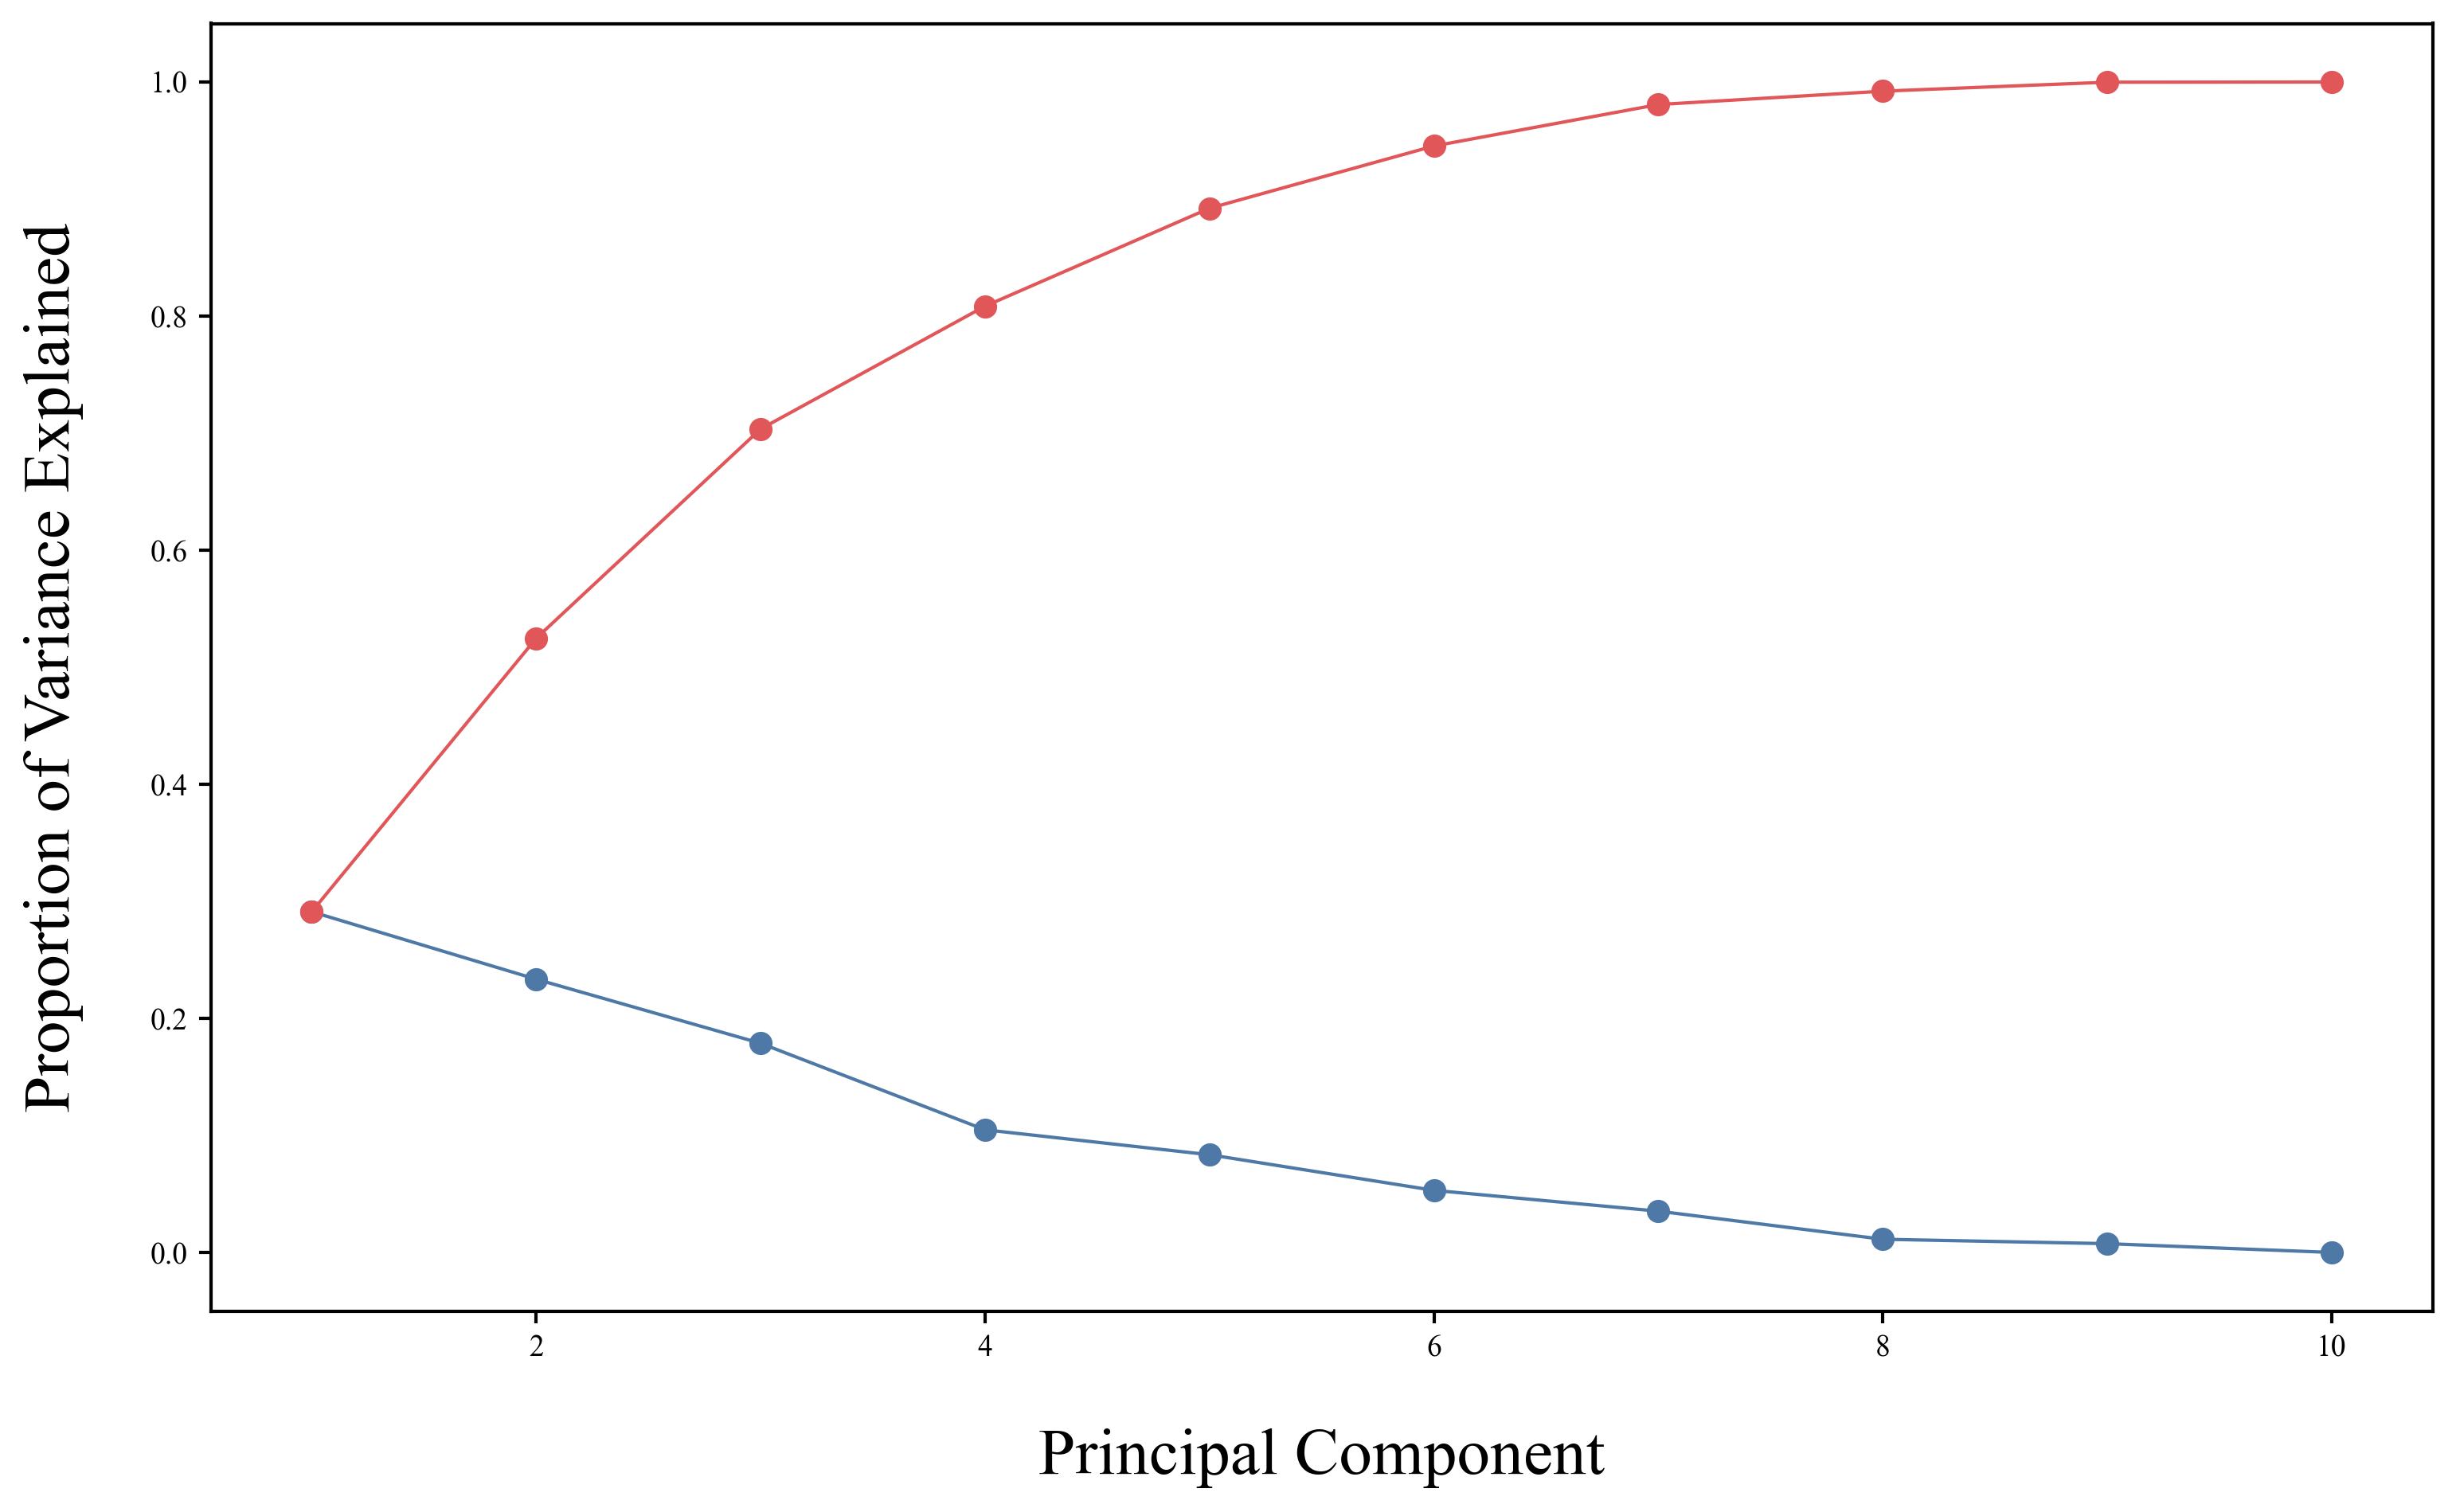

In [6]:
set_journal_style()
plt.figure(figsize=(12,7))
#可视化
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
#画累计百分比
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),pca.explained_variance_ratio_.cumsum(), 'o-')
plt.xlabel('Principal Component',fontsize=20,labelpad=20)
plt.ylabel('Proportion of Variance Explained',fontsize=20,labelpad=20)
plt.show()

In [7]:
# 计算得分（与SAS的协方差矩阵方法一致）
score = pd.DataFrame(pca.components_).T
score.index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
score.columns = ['z1','z2','z3','z4','z5','z6','z7','z8','z9','z10']
score

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
x1,0.261901,0.251769,0.152881,0.519998,0.393960,0.567440,0.252341,-0.116054,0.140921,-0.007374
x2,0.479104,0.029059,-0.207340,-0.052957,-0.373734,0.173367,-0.495262,-0.415088,0.369409,-0.006506
x3,0.218876,-0.078939,0.639019,-0.192112,0.045587,-0.261723,0.126270,0.196433,0.612649,0.012778
x4,0.403914,0.229795,-0.276425,-0.117290,0.028665,-0.449142,0.600643,-0.354847,-0.067386,0.009993
x5,-0.175517,0.597680,0.119118,-0.129267,-0.189122,0.059673,-0.030123,0.016066,0.000223,0.735241
x6,0.512814,0.009310,-0.158175,-0.158364,-0.269955,0.259654,0.146369,0.699107,-0.190264,0.012900
x7,-0.036001,0.463280,-0.136552,0.546020,-0.124748,-0.443102,-0.221870,0.323000,0.154186,-0.279394
x8,-0.185557,0.495935,0.210079,-0.408549,-0.189900,0.259082,0.092776,-0.110281,-0.063124,-0.616953
x9,0.398258,0.158130,0.358912,-0.099770,0.382830,-0.205587,-0.450356,-0.061499,-0.531099,-0.010948
x10,-0.051889,0.183948,-0.466985,-0.399174,0.628803,0.031901,-0.177028,0.201121,0.343182,-0.009041


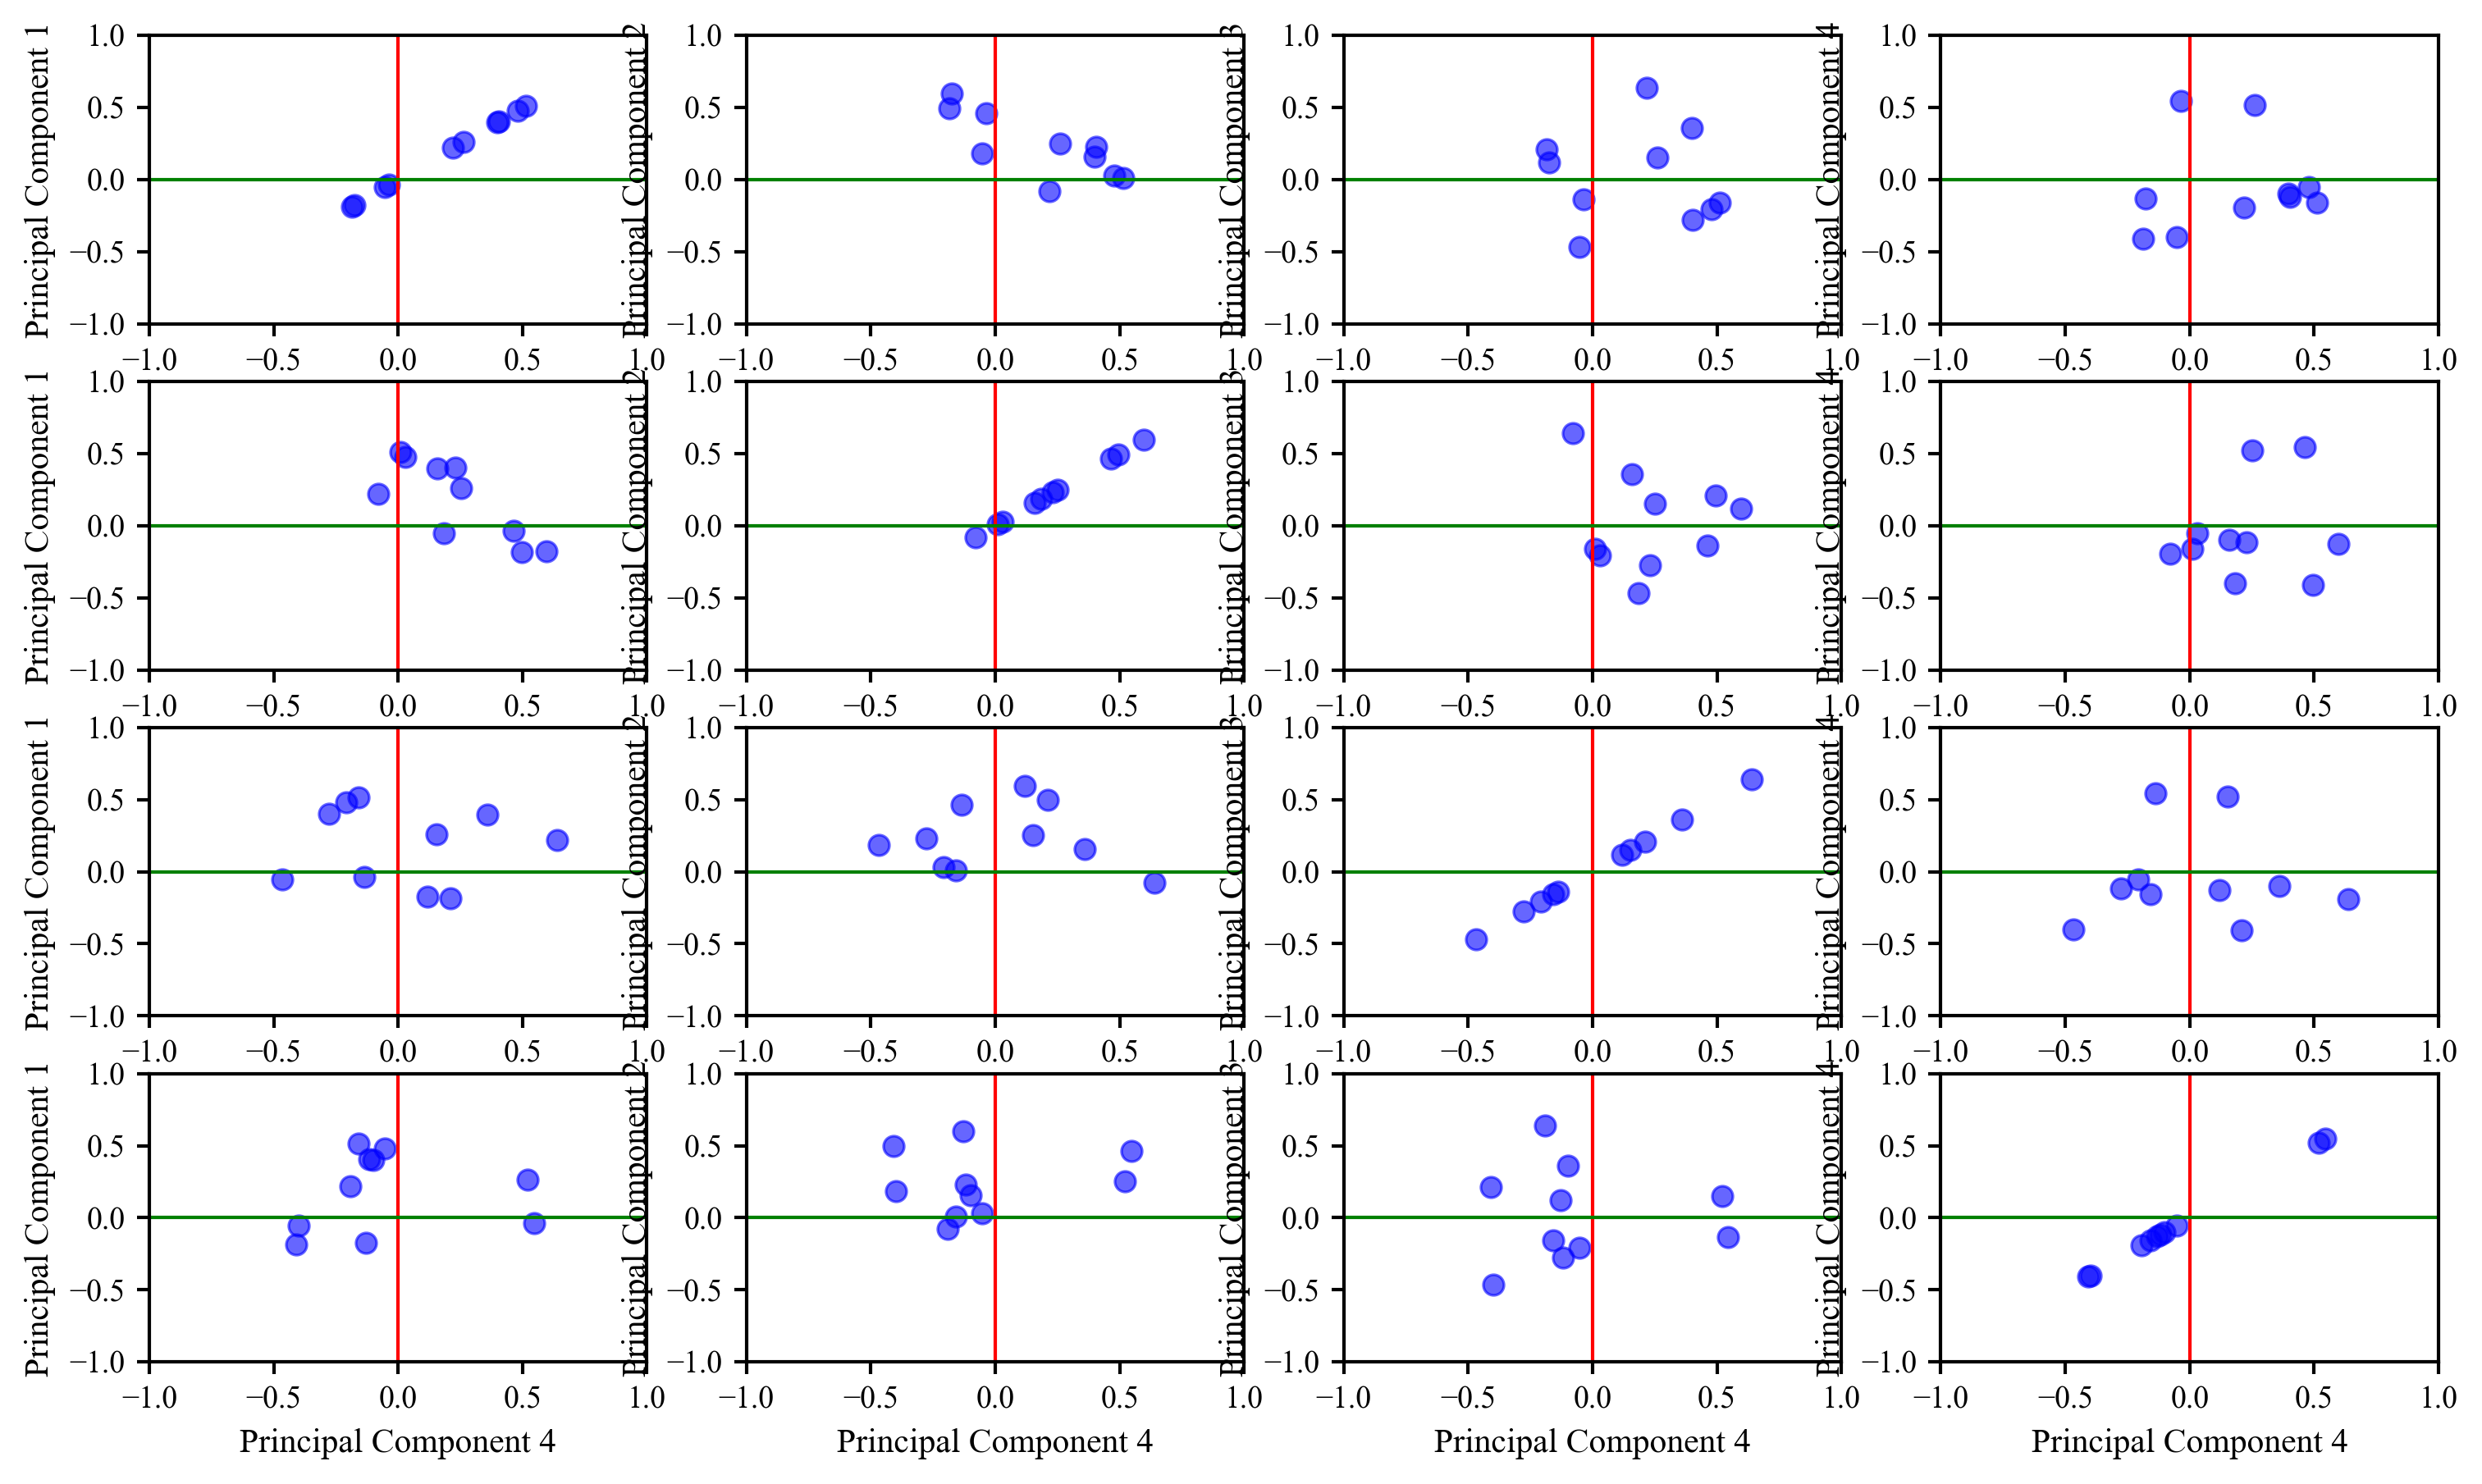

In [11]:
# 可视化
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(4,4,figsize=(12, 7))
# ax.plot(x, y, "o")
# ax[0,0].scatter(score['z1'], score['z2'], c='blue', alpha=0.6)
for i in range(1,5):
    for j in range(1,5):
        ax[i-1,j-1].scatter(score[f'z{i}'], score[f'z{j}'], c='blue', alpha=0.6)
        ax[i-1,j-1].set_xlabel(f'Principal Component {i}')
        ax[i-1,j-1].set_ylabel(f'Principal Component {j}')
        ax[i-1,j-1].set_xlim(-1,1)
        ax[i-1,j-1].set_ylim(-1,1)
        # Annotation
        ax[i-1,j-1].axvline(0, color='r')
        ax[i-1,j-1].axhline(0, color='green')

plt.show()